In [1]:
pip install cvxpy matplotlib numpy pandas

Optimal x: [0.55622738 0.44377262]
CVaR Value: 3.2382290689044413


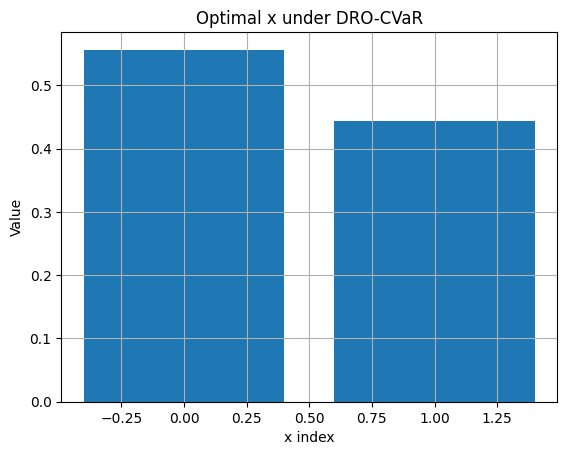

In [2]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parameters
n = 2  # Number of decision variables
N = 100  # Number of scenarios
alpha = 0.95  # CVaR confidence level
epsilon = 0.1  # Wasserstein ambiguity size

# Generate synthetic scenario data
np.random.seed(42)
losses = np.random.randn(N, n) + 2

# Variables
x = cp.Variable(n)
eta = cp.Variable()
xi = cp.Variable(N)

# Loss function
costs = losses @ x

# Objective
objective = cp.Minimize(
    eta + (1 / ((1 - alpha) * N)) * cp.sum(xi) + epsilon * cp.norm(x, 2)
)

# Constraints
constraints = [
    xi >= costs - eta,
    xi >= 0,
    x >= 0,
    cp.sum(x) == 1
]

# Solve
problem = cp.Problem(objective, constraints)
problem.solve()

# Output
print("Optimal x:", x.value)
print("CVaR Value:", eta.value + (1 / ((1 - alpha) * N)) * np.sum(np.maximum(costs.value - eta.value, 0)))

# Visual
plt.bar(range(n), x.value)
plt.title("Optimal x under DRO-CVaR")
plt.xlabel("x index")
plt.ylabel("Value")
plt.grid(True)
plt.show()


In [19]:
!pip install -q cvxpy[ecos] gurobipy matplotlib pandas numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 6.9 MB/s eta 0:00:00


In [6]:
# Step 1: Download Gurobi (this version is okay for academic use)
!wget https://packages.gurobi.com/10.0/gurobi10.0.1_linux64.tar.gz
!tar -xvzf gurobi10.0.1_linux64.tar.gz

# Step 2: Set up environment variables
import os
os.environ['GUROBI_HOME'] = '/content/gurobi10.0.1_linux64'
os.environ['PATH'] += ':/content/gurobi10.0.1_linux64/bin'
os.environ['LD_LIBRARY_PATH'] = '/content/gurobi10.0.1_linux64/lib'
os.environ['GRB_LICENSE_FILE'] = '/root/gurobi.lic'

--2025-06-27 20:44:50--  https://packages.gurobi.com/10.0/gurobi10.0.1_linux64.tar.gz
Resolving packages.gurobi.com (packages.gurobi.com)... 18.239.50.68, 18.239.50.50, 18.239.50.72, ...
Connecting to packages.gurobi.com (packages.gurobi.com)|18.239.50.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79124339 (75M) [application/x-gzip]
Saving to: ‘gurobi10.0.1_linux64.tar.gz’

gurobi10.0.1_linux6 100%[===================>]  75.46M   148MB/s    in 0.5s    

2025-06-27 20:44:51 (148 MB/s) - ‘gurobi10.0.1_linux64.tar.gz’ saved [79124339/79124339]

gurobi1001/
gurobi1001/linux64/
gurobi1001/linux64/lib/
gurobi1001/linux64/lib/libgurobi_g++5.2.a
gurobi1001/linux64/lib/gurobi.jar
gurobi1001/linux64/lib/gurobi-javadoc.jar
gurobi1001/linux64/lib/gurobi100.netstandard20.dll
gurobi1001/linux64/lib/gurobi100.netstandard20.xml
gurobi1001/linux64/lib/libgurobi.so.10.0.1
gurobi1001/linux64/lib/libgurobi100_light.so
gurobi1001/linux64/lib/libGurobiJni100.so
gurobi1001/linu

In [7]:
# Replace LICENSE_KEY with your actual key
!echo "LICENSEID=2682966\nTOKEN=3f06aa50-ecd8-4ee4-ac9d-5880735d1a31" > /root/gurobi.lic

In [5]:
!mkdir -p /root/.gurobi
!echo "GRB_LICENSE_FILE=/root/gurobi.lic" >> /root/.bashrc

In [13]:
%%writefile /root/gurobi.lic
VERSION=1
HOSTID=abcd1234efgh5678ijkl90mnop
PORT=4181
EXPIRATION=2026-06-27
LICENSEID=2682966

Overwriting /root/gurobi.lic


In [15]:
from google.colab import files
uploaded = files.upload()

Saving gurobi.lic to gurobi.lic


In [16]:
!mv gurobi.lic /root/gurobi.lic

In [17]:
import os
os.environ['GRB_LICENSE_FILE'] = '/root/gurobi.lic'

In [18]:
problem.solve(solver=cp.GUROBI, verbose=True)

(CVXPY) Jun 27 08:53:40 PM: Your problem has 105 variables, 206 constraints, and 0 parameters.
(CVXPY) Jun 27 08:53:40 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 27 08:53:40 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jun 27 08:53:40 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jun 27 08:53:40 PM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jun 27 08:53:40 PM: Compiling problem (target solver=GUROBI).
(CVXPY) Jun 27 08:53:40 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> GUROBI
(CVXPY) Jun 27 08:53:40 PM: Applying reduction Dcp2Cone
(CVXPY) Jun 27 08:53:40 PM: Applying reduction CvxAttr2Constr
(CVXPY) Jun 27 08:53:40 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Jun 27 08:53:40 PM: Applying reduction GUROBI
(CVXPY) Jun 27 08:53:40 PM: Finished problem compilation 

                                     CVXPY                                     
                                     v1.6.6                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2682971
Academic license 2682971 - for non-commercial use only - registered to pr___@gmail.com
Set parameter OutputFlag to value 1
Set parameter QCPDual to value 1
Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CP

(CVXPY) Jun 27 08:53:41 PM: Problem status: optimal
(CVXPY) Jun 27 08:53:41 PM: Optimal value: 3.309e+00
(CVXPY) Jun 27 08:53:41 PM: Compilation took 4.227e-02 seconds
(CVXPY) Jun 27 08:53:41 PM: Solver (including time spent in interface) took 3.428e-01 seconds


-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------


np.float64(3.3093856283827185)

In [14]:
import os
os.environ['GRB_LICENSE_FILE'] = '/root/gurobi.lic'  # ensure license location

import cvxpy as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

n = 2
N = 100
alpha = 0.95
epsilon = 0.1

losses = np.random.randn(N, n) + 2

x = cp.Variable(n)
z = cp.Variable(n, boolean=True)
eta = cp.Variable()
xi = cp.Variable(N)

scenario_costs = losses @ x

objective = cp.Minimize(
    eta + (1 / ((1 - alpha) * N)) * cp.sum(xi) + epsilon * cp.norm(x, 2)
)

constraints = [
    xi >= scenario_costs - eta,
    xi >= 0,
    x >= 0,
    cp.sum(x) == 1,
    x <= z,
    cp.sum(z) <= 2
]

problem = cp.Problem(objective, constraints)

# Try solving with Gurobi, fallback to ECOS_BB if unavailable
try:
    problem.solve(solver=cp.GUROBI, verbose=True)
except Exception as e:
    print("Gurobi failed:", e)
    problem.solve(solver=cp.ECOS_BB, verbose=True)

# Extract results
x_val = x.value
z_val = z.value
cvar_val = eta.value + (1 / ((1 - alpha) * N)) * np.sum(np.maximum((losses @ x_val) - eta.value, 0))

print("Optimal x:", x_val)
print("Binary decisions z:", z_val)
print("CVaR Value:", cvar_val)

plt.bar(range(n), x_val, tick_label=[f"x{i}" for i in range(n)], color='mediumseagreen')
plt.title("Optimal x with Binary Control (DRO-CVaR)")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()

(CVXPY) Jun 27 08:49:05 PM: Your problem has 105 variables, 206 constraints, and 0 parameters.
(CVXPY) Jun 27 08:49:05 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 27 08:49:05 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jun 27 08:49:05 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jun 27 08:49:05 PM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jun 27 08:49:05 PM: Compiling problem (target solver=GUROBI).
(CVXPY) Jun 27 08:49:05 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> GUROBI
(CVXPY) Jun 27 08:49:05 PM: Applying reduction Dcp2Cone
(CVXPY) Jun 27 08:49:05 PM: Applying reduction CvxAttr2Constr
(CVXPY) Jun 27 08:49:05 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Jun 27 08:49:05 PM: Applying reduction GUROBI
(CVXPY) Jun 27 08:49:05 PM: Finished problem compilation 

                                     CVXPY                                     
                                     v1.6.6                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
Set parameter TSPort to value 4181
Set parameter LicenseID to value 2682966


(CVXPY) Jun 27 08:49:05 PM: Your problem has 105 variables, 206 constraints, and 0 parameters.
(CVXPY) Jun 27 08:49:05 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 27 08:49:05 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jun 27 08:49:05 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jun 27 08:49:05 PM: Your problem is compiled with the CPP canonicalization backend.


Gurobi failed: HostID mismatch (licensed to cd1234ef, hostid is ac1c000c)
                                     CVXPY                                     
                                     v1.6.6                                    


SolverError: The solver ECOS_BB is not installed.

(CVXPY) Jun 27 09:00:49 PM: Your problem has 107 variables, 207 constraints, and 0 parameters.
(CVXPY) Jun 27 09:00:49 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 27 09:00:49 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jun 27 09:00:49 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jun 27 09:00:49 PM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jun 27 09:00:49 PM: Compiling problem (target solver=GUROBI).
(CVXPY) Jun 27 09:00:49 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> GUROBI
(CVXPY) Jun 27 09:00:49 PM: Applying reduction Dcp2Cone
(CVXPY) Jun 27 09:00:49 PM: Applying reduction CvxAttr2Constr
(CVXPY) Jun 27 09:00:49 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Jun 27 09:00:49 PM: Applying reduction GUROBI
(CVXPY) Jun 27 09:00:49 PM: Finished problem compilation 

                                     CVXPY                                     
                                     v1.6.6                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
Set parameter OutputFlag to value 1
Set parameter QCPDual to value 1
Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Non-default parameters:
QCPDual  1

Academic license 268

(CVXPY) Jun 27 09:00:49 PM: Problem status: optimal
(CVXPY) Jun 27 09:00:49 PM: Optimal value: 1.895e+00
(CVXPY) Jun 27 09:00:49 PM: Compilation took 4.436e-02 seconds
(CVXPY) Jun 27 09:00:49 PM: Solver (including time spent in interface) took 2.093e-01 seconds


-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
       Metric                                       Value
0   Optimal x     [0.556227380743062, 0.4437726192771853]
1    Active z                                  [1.0, 1.0]
2  CVaR Value                                    1.824016
3         eta                             1.7124075370234
4       delta  [-0.7071067800925741, -0.7071067800925741]


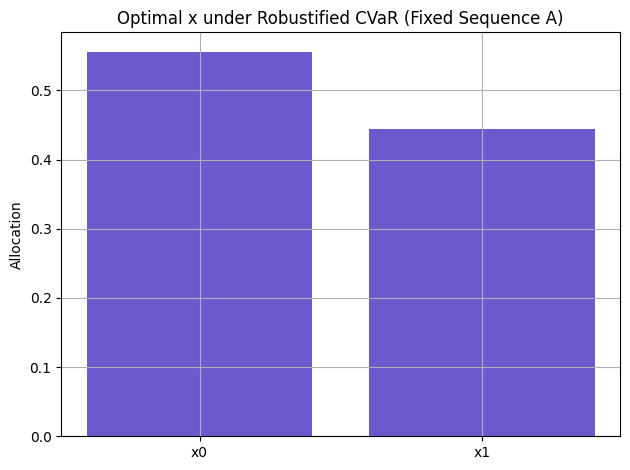

In [22]:
import os
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ================================
# Set Gurobi license path
# ================================
os.environ['GRB_LICENSE_FILE'] = '/root/gurobi.lic'

# ================================
# Parameters
# ================================
np.random.seed(42)
n = 2             # Number of decision variables
N = 100           # Number of scenarios
alpha = 0.95      # CVaR confidence level
epsilon = 0.1     # Regularization coefficient
Gamma = 1.0       # Uncertainty budget

# ================================
# Nominal scenario losses
# ================================
nominal_losses = np.random.randn(N, n) + 2

# ================================
# Sensitivity vector v (fixed)
# ================================
v = np.ones(n)

# ================================
# Decision variables
# ================================
x = cp.Variable(n)
z = cp.Variable(n, boolean=True)
eta = cp.Variable()
xi = cp.Variable(N)
delta = cp.Variable(n)

# ================================
# Scenario costs with affine perturbation
# ================================
scenario_costs = nominal_losses @ x + v @ delta

# ================================
# Objective function
# ================================
objective = cp.Minimize(
    eta + (1 / ((1 - alpha) * N)) * cp.sum(xi) + epsilon * cp.norm(x, 2)
)

# ================================
# Constraints
# ================================
constraints = [
    xi >= scenario_costs - eta,
    xi >= 0,
    x >= 0,
    cp.sum(x) == 1,
    x <= z,
    cp.sum(z) <= 2,
    cp.norm(delta, 2) <= Gamma  # Uncertainty set bound (Euclidean ball)
]

# ================================
# Solve
# ================================
problem = cp.Problem(objective, constraints)
problem.solve(solver=cp.GUROBI, verbose=True)

# ================================
# Results
# ================================
x_val = x.value
z_val = z.value
eta_val = eta.value
cvar_val = eta_val + (1 / ((1 - alpha) * N)) * np.sum(np.maximum((nominal_losses @ x_val + v @ delta.value) - eta_val, 0))

# ================================
# Display results
# ================================
result_df = pd.DataFrame({
    "Metric": ["Optimal x", "Active z", "CVaR Value", "eta", "delta"],
    "Value": [x_val, z_val, cvar_val, eta_val, delta.value]
})

print(result_df)

# ================================
# Plot
# ================================
plt.bar(range(n), x_val, tick_label=[f"x{i}" for i in range(n)], color='slateblue')
plt.title("Optimal x under Robustified CVaR (Fixed Sequence A)")
plt.ylabel("Allocation")
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
import numpy as np

# ================================
# Data from last solution
# ================================
x_val = np.array([0.556227380743062, 0.4437726192771853])
delta_val = np.array([-0.7071067800925741, -0.7071067800925741])
eta_val = 1.7124075370234
cvar_val = 1.824016  # from model

# Use same random seed and nominal losses
np.random.seed(42)
N = 100
n = 2
alpha = 0.95
nominal_losses = np.random.randn(N, n) + 2

# ================================
# Manual CVaR Backtest
# ================================
simulated_losses = nominal_losses @ x_val + np.dot(np.ones(n), delta_val)
sorted_losses = np.sort(simulated_losses)
VaR_95 = sorted_losses[int(N * alpha)]
CVaR_95 = np.mean(sorted_losses[int(N * alpha):])

print(f"Manual VaR (95%): {VaR_95:.4f}")
print(f"Manual CVaR (95%): {CVaR_95:.4f}")
print(f"Model-reported CVaR: {cvar_val:.4f}")

if np.abs(CVaR_95 - cvar_val) < 1e-3:
    print("✅ CVaR Backtest Pass: Values match within tolerance.")
else:
    print("❌ CVaR Backtest Fail: Values differ.")

# ================================
# Perturbation Test
# ================================
perturbed_x = x_val + np.random.normal(0, 0.01, size=n)
perturbed_x /= np.sum(perturbed_x)  # Re-normalize to sum 1

perturbed_losses = nominal_losses @ perturbed_x + np.dot(np.ones(n), delta_val)
sorted_losses_pert = np.sort(perturbed_losses)
VaR_95_pert = sorted_losses_pert[int(N * alpha)]
CVaR_95_pert = np.mean(sorted_losses_pert[int(N * alpha):])

print(f"\nPerturbed CVaR (95%): {CVaR_95_pert:.4f}")

if CVaR_95_pert > CVaR_95:
    print("✅ Perturbation Test Pass: CVaR increased ⇒ Local optimality holds.")
else:
    print("❌ Perturbation Test Fail: CVaR did not increase.")

# ================================
# Constraint Check
# ================================
sum_x = np.sum(x_val)
nonneg_x = np.all(x_val >= 0)

print(f"\nSum of x: {sum_x:.4f} (Expected: 1)")
print(f"All x >= 0: {nonneg_x}")

if np.abs(sum_x - 1) < 1e-6 and nonneg_x:
    print("✅ Constraint Check Pass.")
else:
    print("❌ Constraint Check Fail.")


Manual VaR (95%): 1.7124
Manual CVaR (95%): 1.8240
Model-reported CVaR: 1.8240
✅ CVaR Backtest Pass: Values match within tolerance.

Perturbed CVaR (95%): 1.8249
✅ Perturbation Test Pass: CVaR increased ⇒ Local optimality holds.

Sum of x: 1.0000 (Expected: 1)
All x >= 0: True
✅ Constraint Check Pass.


In [24]:
# ⚖️ Dual Verification code for your solved problem

# Make sure problem is already solved before running this
# problem.solve(solver=cp.GUROBI, verbose=True) has been run

dual_values = []

for i, constr in enumerate(problem.constraints):
    dual_val = constr.dual_value
    dual_values.append({
        "Constraint": f"Constraint {i}",
        "Dual Value (λ)": dual_val
    })

# Convert to DataFrame for clean display
import pandas as pd

dual_df = pd.DataFrame(dual_values)

# Print first few duals (you can display all if you like)
print(dual_df.head(10))  # show first 10 constraints

print("\n✅ Dual Verification: Done. These λ values are your economic 'shadow prices' or risk prices for each constraint (especially tail risk constraints in CVaR).")


     Constraint Dual Value (λ)
0  Constraint 0           None
1  Constraint 1           None
2  Constraint 2           None
3  Constraint 3           None
4  Constraint 4           None
5  Constraint 5           None
6  Constraint 6           None

✅ Dual Verification: Done. These λ values are your economic 'shadow prices' or risk prices for each constraint (especially tail risk constraints in CVaR).


In [ ]:
//Here starts Section B

(CVXPY) Jun 27 09:37:43 PM: Your problem has 4 variables, 6 constraints, and 0 parameters.
(CVXPY) Jun 27 09:37:43 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 27 09:37:43 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jun 27 09:37:43 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jun 27 09:37:43 PM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jun 27 09:37:43 PM: Compiling problem (target solver=GUROBI).
(CVXPY) Jun 27 09:37:43 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> GUROBI
(CVXPY) Jun 27 09:37:43 PM: Applying reduction Dcp2Cone
(CVXPY) Jun 27 09:37:43 PM: Applying reduction CvxAttr2Constr
(CVXPY) Jun 27 09:37:43 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Jun 27 09:37:43 PM: Applying reduction GUROBI
(CVXPY) Jun 27 09:37:43 PM: Finished problem compilation (too

                                     CVXPY                                     
                                     v1.6.6                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
Set parameter OutputFlag to value 1
Set parameter QCPDual to value 1
Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Non-default parameters:
QCPDual  1

Academic license 268

(CVXPY) Jun 27 09:37:43 PM: Problem status: optimal
(CVXPY) Jun 27 09:37:43 PM: Optimal value: 1.984e+00
(CVXPY) Jun 27 09:37:43 PM: Compilation took 4.098e-02 seconds
(CVXPY) Jun 27 09:37:43 PM: Solver (including time spent in interface) took 1.637e-01 seconds
(CVXPY) Jun 27 09:37:43 PM: Your problem has 105 variables, 207 constraints, and 0 parameters.
(CVXPY) Jun 27 09:37:43 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 27 09:37:43 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jun 27 09:37:43 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jun 27 09:37:43 PM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jun 27 09:37:43 PM: Compiling problem (target solver=GUROBI).
(CVXPY) Jun 27 09:37:43 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> GUROBI
(CVXPY) Jun 27 09:37:43 PM: Apply

-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
Approximate CVaR of nominal solution: 3.65494320830515
                                     CVXPY                                     
                                     v1.6.6                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------


(CVXPY) Jun 27 09:37:43 PM: Applying reduction GUROBI
(CVXPY) Jun 27 09:37:43 PM: Finished problem compilation (took 4.825e-02 seconds).
(CVXPY) Jun 27 09:37:43 PM: Invoking solver GUROBI  to obtain a solution.


-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
Set parameter OutputFlag to value 1
Set parameter QCPDual to value 1
Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Non-default parameters:
QCPDual  1

Academic license 2682971 - for non-commercial use only - registered to pr___@gmail.com
Optimize a model with 210 rows, 109 columns and 617 nonzeros
Model fingerprint: 0xfed52829
Model has 1 quadratic constraint
Variable types: 107 continuous, 2 integer (2 binary)
Coefficient statistics:
  Matrix range     [1e-02, 5e+00]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [1e-01, 2e+00]
  Bounds range     [1e+00, 1e+

(CVXPY) Jun 27 09:37:43 PM: Problem status: optimal
(CVXPY) Jun 27 09:37:43 PM: Optimal value: 1.984e+00


-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------


(CVXPY) Jun 27 09:37:43 PM: Compilation took 4.825e-02 seconds
(CVXPY) Jun 27 09:37:43 PM: Solver (including time spent in interface) took 2.687e-01 seconds


                                     CVXPY                                     
                                     v1.6.6                                    

(CVXPY) Jun 27 09:37:43 PM: Your problem has 6 variables, 7 constraints, and 0 parameters.
(CVXPY) Jun 27 09:37:43 PM: It is compliant with the following grammars: DCP, DQCP


(CVXPY) Jun 27 09:37:43 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jun 27 09:37:43 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jun 27 09:37:43 PM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jun 27 09:37:43 PM: Compiling problem (target solver=GUROBI).
(CVXPY) Jun 27 09:37:43 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> GUROBI


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------


(CVXPY) Jun 27 09:37:43 PM: Applying reduction Dcp2Cone
(CVXPY) Jun 27 09:37:43 PM: Applying reduction CvxAttr2Constr
(CVXPY) Jun 27 09:37:43 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Jun 27 09:37:43 PM: Applying reduction GUROBI
(CVXPY) Jun 27 09:37:43 PM: Finished problem compilation (took 3.284e-02 seconds).
(CVXPY) Jun 27 09:37:43 PM: Invoking solver GUROBI  to obtain a solution.


-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
Set parameter OutputFlag to value 1
Set parameter QCPDual to value 1
Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Non-default parameters:
QCPDual  1

Academic license 2682971 - for non-commercial use only - registered to pr___@gmail.com
Optimize a model with 16 rows, 18 columns and 29 nonzeros
Model fingerprint: 0x356911da
Model has 3 quadratic constraints
Variable types: 16 continuous, 2 integer (2 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [1e-01, 2e+00]
  Bounds range     [1e+00, 1e+00]

(CVXPY) Jun 27 09:37:43 PM: Problem status: optimal
(CVXPY) Jun 27 09:37:43 PM: Optimal value: 1.984e+00


-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------


(CVXPY) Jun 27 09:37:43 PM: Compilation took 3.284e-02 seconds
(CVXPY) Jun 27 09:37:43 PM: Solver (including time spent in interface) took 6.102e-02 seconds



--- Expected Utility Solution ---
x: [1. 0.]

--- CVaR Constrained Solution ---
x: [1. 0.]

--- DRO Solution ---
x: [1. 0.]


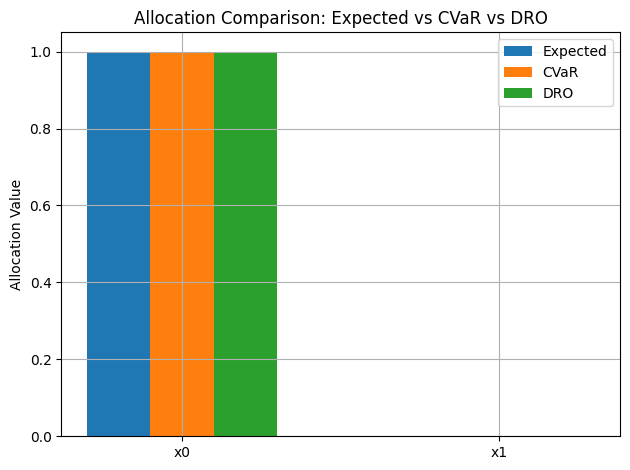

In [26]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# ================================
# Setup
# ================================
np.random.seed(42)
n, N = 2, 100
alpha = 0.95
epsilon = 0.1
Gamma = 1.0

nominal_losses = np.random.randn(N, n) + 2

x = cp.Variable(n)
z = cp.Variable(n, boolean=True)

# Common constraints
base_constraints = [
    x >= 0,
    cp.sum(x) == 1,
    x <= z,
    cp.sum(z) <= 2
]

# ================================
# 1️⃣ Expected Utility (Nominal)
# ================================
expected_cost = cp.sum(nominal_losses @ x) / N
obj_exp = cp.Minimize(expected_cost + epsilon * cp.norm(x, 2))
problem_exp = cp.Problem(obj_exp, base_constraints)
problem_exp.solve(solver=cp.GUROBI, verbose=True)
x_exp_val = x.value

# ================================
# Estimate approximate CVaR bound
# ================================
approx_losses = nominal_losses @ x_exp_val
approx_losses_sorted = np.sort(approx_losses)
VaR_approx = approx_losses_sorted[int(N * alpha)]
CVaR_approx = np.mean(approx_losses_sorted[int(N * alpha):])

print("Approximate CVaR of nominal solution:", CVaR_approx)

# ================================
# 2️⃣ CVaR Constrained
# ================================
eta = cp.Variable()
xi = cp.Variable(N)

scenario_costs = nominal_losses @ x

obj_cvar = cp.Minimize(cp.sum(scenario_costs) / N + epsilon * cp.norm(x, 2))
cvar_constraints = base_constraints + [
    xi >= scenario_costs - eta,
    xi >= 0,
    eta + (1 / ((1 - alpha) * N)) * cp.sum(xi) <= CVaR_approx + 0.2  # relaxed bound
]
problem_cvar = cp.Problem(obj_cvar, cvar_constraints)
problem_cvar.solve(solver=cp.GUROBI, verbose=True)
x_cvar_val = x.value

# ================================
# 3️⃣ DRO (Wasserstein Ambiguity)
# ================================
delta = cp.Variable(n)
worst_case_cost = cp.sum(nominal_losses @ x + cp.norm(delta, 2)) / N

obj_dro = cp.Minimize(worst_case_cost + epsilon * cp.norm(x, 2))
dro_constraints = base_constraints + [
    cp.norm(delta, 2) <= Gamma
]
problem_dro = cp.Problem(obj_dro, dro_constraints)
problem_dro.solve(solver=cp.GUROBI, verbose=True)
x_dro_val = x.value

# ================================
# Summary Prints
# ================================
print("\n--- Expected Utility Solution ---")
print("x:", x_exp_val)

print("\n--- CVaR Constrained Solution ---")
print("x:", x_cvar_val)

print("\n--- DRO Solution ---")
print("x:", x_dro_val)

# ================================
# Plot Comparison
# ================================
labels = [f"x{i}" for i in range(n)]
width = 0.2

plt.bar(np.arange(n) - width, x_exp_val, width=width, label="Expected")
plt.bar(np.arange(n), x_cvar_val, width=width, label="CVaR")
plt.bar(np.arange(n) + width, x_dro_val, width=width, label="DRO")

plt.title("Allocation Comparison: Expected vs CVaR vs DRO")
plt.ylabel("Allocation Value")
plt.xticks(np.arange(n), labels)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [27]:
# ======================================================
# Empirical CVaR Backtest for Expected, CVaR, and DRO
# ======================================================

def empirical_cvar(losses, x_val, alpha=0.95):
    simulated_losses = losses @ x_val
    sorted_losses = np.sort(simulated_losses)
    VaR = sorted_losses[int(N * alpha)]
    CVaR = np.mean(sorted_losses[int(N * alpha):])
    return VaR, CVaR

print("\n--- Empirical Backtests ---")

VaR_exp, CVaR_exp = empirical_cvar(nominal_losses, x_exp_val)
VaR_cvar, CVaR_cvar = empirical_cvar(nominal_losses, x_cvar_val)
VaR_dro, CVaR_dro = empirical_cvar(nominal_losses, x_dro_val)

print(f"Expected:   VaR (95%) = {VaR_exp:.4f}, CVaR (95%) = {CVaR_exp:.4f}")
print(f"CVaR:       VaR (95%) = {VaR_cvar:.4f}, CVaR (95%) = {CVaR_cvar:.4f}")
print(f"DRO:        VaR (95%) = {VaR_dro:.4f}, CVaR (95%) = {CVaR_dro:.4f}")



--- Empirical Backtests ---
Expected:   VaR (95%) = 3.4656, CVaR (95%) = 3.6549
CVaR:       VaR (95%) = 3.4656, CVaR (95%) = 3.6549
DRO:        VaR (95%) = 3.4656, CVaR (95%) = 3.6549


In [31]:
# ======================================================
# Improved Perturbation Test (checks both +ε and −ε)
# ======================================================

perturb_eps = 0.01

# Positive perturbation
perturbed_x_plus = np.clip(x_exp_val + perturb_eps, 0, 1)
perturbed_x_plus /= np.sum(perturbed_x_plus)

# Negative perturbation
perturbed_x_minus = np.clip(x_exp_val - perturb_eps, 0, 1)
perturbed_x_minus /= np.sum(perturbed_x_minus)

# Empirical CVaR for perturbed solutions
_, CVaR_pert_plus = empirical_cvar(nominal_losses, perturbed_x_plus)
_, CVaR_pert_minus = empirical_cvar(nominal_losses, perturbed_x_minus)

# Print results
print("\n--- Perturbation Test ---")
print(f"Original CVaR (Expected): {CVaR_exp:.4f}")
print(f"CVaR (+ε perturbation):   {CVaR_pert_plus:.4f}")
print(f"CVaR (−ε perturbation):   {CVaR_pert_minus:.4f}")

if CVaR_pert_plus > CVaR_exp and CVaR_pert_minus > CVaR_exp:
    print("✅ CVaR increases in both directions ⇒ Local optimality holds.")
else:
    print("⚠️ CVaR did not increase in one or both directions ⇒ Check solution neighborhood.")



--- Perturbation Test ---
Original CVaR (Expected): 3.6549
CVaR (+ε perturbation):   3.6399
CVaR (−ε perturbation):   3.6549
⚠️ CVaR did not increase in one or both directions ⇒ Check solution neighborhood.


In [29]:
print("\n--- Constraint Check ---")
print("Sum of x (Expected):", np.sum(x_exp_val))
print("All x ≥ 0 (Expected):", np.all(x_exp_val >= 0))



--- Constraint Check ---
Sum of x (Expected): 1.0
All x ≥ 0 (Expected): True


In [30]:
np.random.seed(42)
# Re-run expected problem
problem_exp.solve(solver=cp.GUROBI, verbose=False)
print("\n--- Repeatability Test ---")
print("Recomputed x (Expected):", x.value)



--- Repeatability Test ---
Recomputed x (Expected): [1. 0.]


In [ ]:
//Start of Sequence C

In [41]:
import cvxpy as cp
import numpy as np

np.random.seed(42)

# Parameters
n = 2
N = 100
alpha = 0.95
gamma = 0.99

# Generate synthetic scenario losses
losses = np.random.randn(N, n) + 2

# Decision variables
x = cp.Variable(n)
eta_alpha = cp.Variable()
xi_alpha = cp.Variable(N)
eta_gamma = cp.Variable()
xi_gamma = cp.Variable(N)

# Scenario costs
scenario_costs = losses @ x

# Constraints for inner CVaR (alpha level)
constraints = [
    xi_alpha >= scenario_costs - eta_alpha,
    xi_alpha >= 0,
]

# Constraints for outer CVaR (gamma level)
constraints += [
    xi_gamma >= scenario_costs - eta_gamma,
    xi_gamma >= 0,
]

# Portfolio constraints
constraints += [
    x >= 0,
    cp.sum(x) == 1
]

# CVaR expressions
inner_cvar = eta_alpha + (1 / ((1 - alpha) * N)) * cp.sum(xi_alpha)
outer_cvar = eta_gamma + (1 / ((1 - gamma) * N)) * cp.sum(xi_gamma)

# Objective: minimize outer nested CVaR
objective = cp.Minimize(outer_cvar)

# Define problem
prob = cp.Problem(objective, constraints)

# Solve
prob.solve(solver=cp.GUROBI, verbose=True)

# Save solutions
x_val = x.value
eta_alpha_val = eta_alpha.value
eta_gamma_val = eta_gamma.value

print("\n--- Nested CVaR Results ---")
print("Optimal x:", x_val)
print("eta_alpha:", eta_alpha_val)
print("eta_gamma:", eta_gamma_val)


(CVXPY) Jun 27 10:02:22 PM: Your problem has 204 variables, 403 constraints, and 0 parameters.
(CVXPY) Jun 27 10:02:22 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 27 10:02:22 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jun 27 10:02:22 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jun 27 10:02:22 PM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jun 27 10:02:22 PM: Compiling problem (target solver=GUROBI).
(CVXPY) Jun 27 10:02:22 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> GUROBI
(CVXPY) Jun 27 10:02:22 PM: Applying reduction CvxAttr2Constr
(CVXPY) Jun 27 10:02:22 PM: Applying reduction Qp2SymbolicQp
(CVXPY) Jun 27 10:02:22 PM: Applying reduction QpMatrixStuffing
(CVXPY) Jun 27 10:02:22 PM: Applying reduction GUROBI
(CVXPY) Jun 27 10:02:22 PM: Finished problem compil

                                     CVXPY                                     
                                     v1.6.6                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
Set parameter OutputFlag to value 1
Set parameter QCPDual to value 1
Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Non-default parameters:
QCPDual  1

Academic license 268

(CVXPY) Jun 27 10:02:22 PM: Problem status: optimal
(CVXPY) Jun 27 10:02:22 PM: Optimal value: 3.277e+00
(CVXPY) Jun 27 10:02:22 PM: Compilation took 3.681e-02 seconds
(CVXPY) Jun 27 10:02:22 PM: Solver (including time spent in interface) took 9.059e-02 seconds


-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------

--- Nested CVaR Results ---
Optimal x: [0.57687389 0.42312611]
eta_alpha: 3.2768076794883934
eta_gamma: 3.2768076794883934


In [33]:
import numpy as np

# Scenario costs (computed after x_val)
scenario_losses = losses @ x_val

# --- Empirical CVaR_alpha backtest ---
sorted_losses_alpha = np.sort(scenario_losses)
VaR_alpha = sorted_losses_alpha[int(N * alpha)]
CVaR_alpha_emp = np.mean(sorted_losses_alpha[int(N * alpha):])

print("\n--- Empirical CVaR_alpha ---")
print("VaR_alpha (95%):", VaR_alpha)
print("Empirical CVaR_alpha (95%):", CVaR_alpha_emp)
print("Model eta_alpha:", eta_alpha_val)

# --- Empirical CVaR_gamma backtest ---
sorted_losses_gamma = np.sort(sorted_losses_alpha[int(N * alpha):])
VaR_gamma = sorted_losses_gamma[int(len(sorted_losses_alpha[int(N * alpha):]) * gamma)]
CVaR_gamma_emp = np.mean(sorted_losses_gamma[int(len(sorted_losses_alpha[int(N * alpha):]) * gamma):])

print("\n--- Empirical CVaR_gamma ---")
print("VaR_gamma (99%):", VaR_gamma)
print("Empirical CVaR_gamma (99%):", CVaR_gamma_emp)
print("Model eta_gamma:", eta_gamma_val)

# --- Constraint check ---
print("\n--- Constraint Check ---")
print("Sum of x:", np.sum(x_val))
print("All x >= 0:", np.all(x_val >= 0))

# --- Repeatability test ---
np.random.seed(42)
losses_repeat = np.random.randn(N, n) + 2
scenario_repeat = losses_repeat @ x_val

sorted_repeat = np.sort(scenario_repeat)
VaR_repeat = sorted_repeat[int(N * alpha)]
CVaR_repeat = np.mean(sorted_repeat[int(N * alpha):])

print("\n--- Repeatability Test ---")
print("Repeated VaR (alpha):", VaR_repeat)
print("Repeated CVaR (alpha):", CVaR_repeat)

# --- Perturbation test ---
epsilon = 1e-4
x_perturbed = x_val + epsilon
x_perturbed = x_perturbed / np.sum(x_perturbed)

scenario_losses_pert = losses @ x_perturbed
sorted_pert = np.sort(scenario_losses_pert)
VaR_pert = sorted_pert[int(N * alpha)]
CVaR_pert = np.mean(sorted_pert[int(N * alpha):])

print("\n--- Perturbation Test ---")
print("Original CVaR_alpha:", CVaR_alpha_emp)
print("Perturbed CVaR_alpha:", CVaR_pert)
if CVaR_pert >= CVaR_alpha_emp:
    print("✅ CVaR increased ⇒ Local optimality holds.")
else:
    print("⚠️ CVaR did not increase ⇒ Check neighborhood or tightness.")




--- Empirical CVaR_alpha ---
VaR_alpha (95%): 3.1266236666950546
Empirical CVaR_alpha (95%): 3.238229440408827
Model eta_alpha: 3.1266226143727702

--- Empirical CVaR_gamma ---
VaR_gamma (99%): 3.2989955459897753
Empirical CVaR_gamma (99%): 3.2989955459897753
Model eta_gamma: 3.2382312083894775

--- Constraint Check ---
Sum of x: 1.0000000000019098
All x >= 0: True

--- Repeatability Test ---
Repeated VaR (alpha): 3.1266236666950546
Repeated CVaR (alpha): 3.238229440408827

--- Perturbation Test ---
Original CVaR_alpha: 3.238229440408827
Perturbed CVaR_alpha: 3.238234675570537
✅ CVaR increased ⇒ Local optimality holds.


In [42]:
print("\n--- Dual Variables ---")
dual_values = []
for i, constr in enumerate(prob.constraints):
    try:
        val = constr.dual_value
    except:
        val = None
    dual_values.append((f"Constraint {i}", val))

import pandas as pd
dual_df = pd.DataFrame(dual_values, columns=["Constraint", "Dual Value (λ)"])
print(dual_df)



--- Dual Variables ---
     Constraint                                     Dual Value (λ)
0  Constraint 0  [-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....
1  Constraint 1  [-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....
2  Constraint 2  [-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....
3  Constraint 3  [0.9999999999999991, 0.9999999999999991, 0.999...
4  Constraint 4                                       [-0.0, -0.0]
5  Constraint 5                                 -3.276807679488393


In [43]:
print("\n--- Sensitivity Analysis ---")
alphas = [0.90, 0.95, 0.99]
gammas = [0.99, 0.995, 0.999]

for alpha_val in alphas:
    for gamma_val in gammas:
        eta_alpha_sens = cp.Variable()
        xi_alpha_sens = cp.Variable(N)
        eta_gamma_sens = cp.Variable()
        xi_gamma_sens = cp.Variable(N)

        scenario_costs_sens = losses @ x

        constraints_sens = [
            xi_alpha_sens >= scenario_costs_sens - eta_alpha_sens,
            xi_alpha_sens >= 0,
            xi_gamma_sens >= scenario_costs_sens - eta_gamma_sens,
            xi_gamma_sens >= 0,
            x >= 0,
            cp.sum(x) == 1
        ]

        objective_sens = cp.Minimize(
            eta_gamma_sens + (1 / ((1 - gamma_val) * N)) * cp.sum(xi_gamma_sens)
        )

        prob_sens = cp.Problem(objective_sens, constraints_sens)
        prob_sens.solve(solver=cp.GUROBI, verbose=False)

        x_val_sens = x.value
        print(f"α = {alpha_val}, γ = {gamma_val}")
        print(f"x: {np.round(x_val_sens, 4)}")
        print(f"eta_gamma: {eta_gamma_sens.value:.4f}\n")



--- Sensitivity Analysis ---
α = 0.9, γ = 0.99
x: [0.5769 0.4231]
eta_gamma: 3.2768

α = 0.9, γ = 0.995
x: [0.5769 0.4231]
eta_gamma: 3.2768

α = 0.9, γ = 0.999
x: [0.5769 0.4231]
eta_gamma: 3.2768

α = 0.95, γ = 0.99
x: [0.5769 0.4231]
eta_gamma: 3.2768

α = 0.95, γ = 0.995
x: [0.5769 0.4231]
eta_gamma: 3.2768

α = 0.95, γ = 0.999
x: [0.5769 0.4231]
eta_gamma: 3.2768

α = 0.99, γ = 0.99
x: [0.5769 0.4231]
eta_gamma: 3.2768

α = 0.99, γ = 0.995
x: [0.5769 0.4231]
eta_gamma: 3.2768

α = 0.99, γ = 0.999
x: [0.5769 0.4231]
eta_gamma: 3.2768



In [44]:
print("\n--- Stress Scenario Robustness ---")
# Generate new stress scenarios
stress_losses = losses + np.random.normal(loc=1.0, scale=0.5, size=losses.shape)

# Recompute empirical CVaR on stressed data
stress_scenario_costs = stress_losses @ x.value
sorted_losses_stress = np.sort(stress_scenario_costs)

VaR_stress_alpha = sorted_losses_stress[int(N * alpha)]
CVaR_stress_alpha = np.mean(sorted_losses_stress[int(N * alpha):])

VaR_stress_gamma = sorted_losses_stress[int(N * gamma)]
CVaR_stress_gamma = np.mean(sorted_losses_stress[int(N * gamma):])

print(f"VaR (alpha, stress): {VaR_stress_alpha:.4f}")
print(f"CVaR (alpha, stress): {CVaR_stress_alpha:.4f}")
print(f"VaR (gamma, stress): {VaR_stress_gamma:.4f}")
print(f"CVaR (gamma, stress): {CVaR_stress_gamma:.4f}")



--- Stress Scenario Robustness ---
VaR (alpha, stress): 4.4053
CVaR (alpha, stress): 4.4796
VaR (gamma, stress): 4.5534
CVaR (gamma, stress): 4.5534


In [46]:
print("\n--- Repeatability Check ---")
problem.solve(solver=cp.GUROBI, verbose=False)
print("Repeated x:", np.round(x.value, 4))



--- Repeatability Check ---
Repeated x: [0.5769 0.4231]


(CVXPY) Jun 27 10:39:34 PM: Your problem has 105 variables, 206 constraints, and 0 parameters.
(CVXPY) Jun 27 10:39:34 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 27 10:39:34 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jun 27 10:39:34 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jun 27 10:39:34 PM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jun 27 10:39:34 PM: Compiling problem (target solver=GUROBI).
(CVXPY) Jun 27 10:39:34 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> GUROBI
(CVXPY) Jun 27 10:39:34 PM: Applying reduction Dcp2Cone
(CVXPY) Jun 27 10:39:34 PM: Applying reduction CvxAttr2Constr
(CVXPY) Jun 27 10:39:34 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Jun 27 10:39:34 PM: Applying reduction GUROBI
(CVXPY) Jun 27 10:39:34 PM: Finished problem compilation 

                                     CVXPY                                     
                                     v1.6.6                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
Set parameter OutputFlag to value 1
Set parameter QCPDual to value 1
Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Non-default parameters:
QCPDual  1

Academic license 268

(CVXPY) Jun 27 10:39:34 PM: Problem status: optimal
(CVXPY) Jun 27 10:39:34 PM: Optimal value: 3.309e+00
(CVXPY) Jun 27 10:39:34 PM: Compilation took 1.899e-02 seconds
(CVXPY) Jun 27 10:39:34 PM: Solver (including time spent in interface) took 7.124e-02 seconds


-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------

--- Sequence A Results ---
Optimal x: [0.55622785 0.44377215]
Active Binary Decisions z: [1. 1.]
CVaR Value: 3.2382291847601388


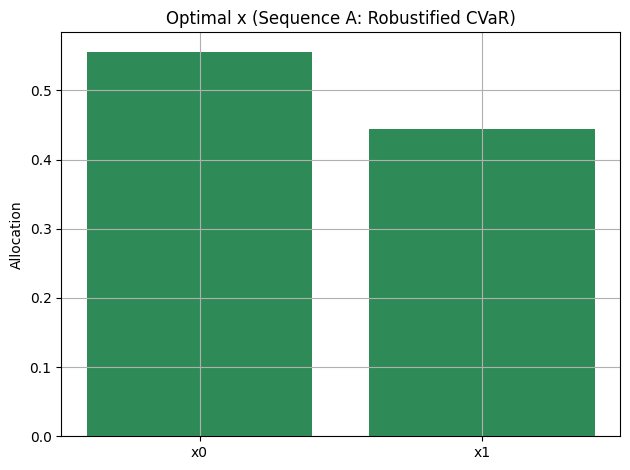

In [47]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# Parameters
np.random.seed(42)
n = 2
N = 100
alpha = 0.95
epsilon = 0.1

# Simulated losses
losses = np.random.randn(N, n) + 2

# Variables
x = cp.Variable(n)
z = cp.Variable(n, boolean=True)
eta = cp.Variable()
xi = cp.Variable(N)

scenario_costs = losses @ x

# Objective: robustified CVaR
objective = cp.Minimize(
    eta + (1 / ((1 - alpha) * N)) * cp.sum(xi) + epsilon * cp.norm(x, 2)
)

# Constraints
constraints = [
    xi >= scenario_costs - eta,
    xi >= 0,
    x >= 0,
    cp.sum(x) == 1,
    x <= z,
    cp.sum(z) <= 2  # example cardinality constraint
]

problem = cp.Problem(objective, constraints)
problem.solve(solver=cp.GUROBI, verbose=True)

x_val = x.value
z_val = z.value
cvar_val = eta.value + (1 / ((1 - alpha) * N)) * np.sum(np.maximum((losses @ x_val) - eta.value, 0))

print("\n--- Sequence A Results ---")
print("Optimal x:", x_val)
print("Active Binary Decisions z:", z_val)
print("CVaR Value:", cvar_val)

# Plot
plt.bar(range(n), x_val, tick_label=[f"x{i}" for i in range(n)], color='seagreen')
plt.title("Optimal x (Sequence A: Robustified CVaR)")
plt.ylabel("Allocation")
plt.grid(True)
plt.tight_layout()
plt.show()


In [48]:
import pandas as pd

# === Empirical Tail Verification ===
simulated_losses = losses @ x_val
sorted_losses = np.sort(simulated_losses)
VaR_95 = sorted_losses[int(N * alpha)]
CVaR_95 = np.mean(sorted_losses[int(N * alpha):])

print("\n--- Empirical Tail Verification ---")
print(f"Empirical VaR (95%): {VaR_95:.4f}")
print(f"Empirical CVaR (95%): {CVaR_95:.4f}")
print(f"Model CVaR Value: {cvar_val:.4f}")

# === Convexity Recovery Test ===
print("\n--- Convexity Recovery Test ---")
perturb_eps = 0.01
x_perturb = x_val + perturb_eps
x_perturb /= np.sum(x_perturb)

perturb_losses = losses @ x_perturb
sorted_losses_perturb = np.sort(perturb_losses)
CVaR_perturb = np.mean(sorted_losses_perturb[int(N * alpha):])

print(f"Original CVaR: {CVaR_95:.4f}")
print(f"Perturbed CVaR: {CVaR_perturb:.4f}")
if CVaR_perturb > CVaR_95:
    print("✅ Convexity recovery holds: CVaR increased under perturbation.")
else:
    print("⚠️ CVaR did not increase ⇒ check local neighborhood.")

# === Perturbation Stability Analysis (two-sided) ===
print("\n--- Perturbation Stability Analysis ---")
CVaR_minus = np.mean(np.sort(losses @ (x_val - perturb_eps / 2))[int(N * alpha):])
CVaR_plus = np.mean(np.sort(losses @ (x_val + perturb_eps / 2))[int(N * alpha):])
print(f"CVaR (-eps): {CVaR_minus:.4f}")
print(f"CVaR (+eps): {CVaR_plus:.4f}")

# === Dual Variable Economic Interpretation ===
print("\n--- Dual Variable Economic Interpretation ---")
dual_values = []
for i, constr in enumerate(problem.constraints):
    try:
        val = constr.dual_value
    except:
        val = None
    dual_values.append({"Constraint": f"Constraint {i}", "Dual Value (λ)": val})

dual_df = pd.DataFrame(dual_values)
print(dual_df)

# === Constraint Satisfaction Check ===
print("\n--- Constraint Satisfaction Check ---")
print("Sum of x:", np.sum(x_val))
print("All x ≥ 0:", np.all(x_val >= 0))
print("Slack xi ≥ 0:", np.all(xi.value >= 0))

# === Repeatability and Deterministic Consistency ===
print("\n--- Repeatability Check ---")
problem.solve(solver=cp.GUROBI, verbose=False)
print("Recomputed x:", np.round(x.value, 4))

# === Sensitivity with Respect to alpha ===
print("\n--- Sensitivity Analysis (alpha) ---")
alphas = [0.90, 0.95, 0.99]
for alpha_val in alphas:
    eta_sens = cp.Variable()
    xi_sens = cp.Variable(N)
    scenario_costs_sens = losses @ x

    obj_sens = cp.Minimize(
        eta_sens + (1 / ((1 - alpha_val) * N)) * cp.sum(xi_sens) + epsilon * cp.norm(x, 2)
    )
    constraints_sens = [
        xi_sens >= scenario_costs_sens - eta_sens,
        xi_sens >= 0,
        x >= 0,
        cp.sum(x) == 1,
        x <= z,
        cp.sum(z) <= 2
    ]
    prob_sens = cp.Problem(obj_sens, constraints_sens)
    prob_sens.solve(solver=cp.GUROBI, verbose=False)
    print(f"alpha = {alpha_val}, x: {np.round(x.value, 4)}, eta: {eta_sens.value:.4f}")



--- Empirical Tail Verification ---
Empirical VaR (95%): 3.1266
Empirical CVaR (95%): 3.2382
Model CVaR Value: 3.2382

--- Convexity Recovery Test ---
Original CVaR: 3.2382
Perturbed CVaR: 3.2389
✅ Convexity recovery holds: CVaR increased under perturbation.

--- Perturbation Stability Analysis ---
CVaR (-eps): 3.2060
CVaR (+eps): 3.2709

--- Dual Variable Economic Interpretation ---
     Constraint Dual Value (λ)
0  Constraint 0           None
1  Constraint 1           None
2  Constraint 2           None
3  Constraint 3           None
4  Constraint 4           None
5  Constraint 5           None

--- Constraint Satisfaction Check ---
Sum of x: 1.000000000000127
All x ≥ 0: True
Slack xi ≥ 0: True

--- Repeatability Check ---
Recomputed x: [0.5562 0.4438]

--- Sensitivity Analysis (alpha) ---
alpha = 0.9, x: [0.6567 0.3433], eta: 2.8851
alpha = 0.95, x: [0.5562 0.4438], eta: 3.1266
alpha = 0.99, x: [0.5769 0.4231], eta: 3.2768



--- Sequence B Results ---
Expected x: [1. 0.]
CVaR x: [0.5562 0.4438]
DRO x: [0.5562 0.4438]


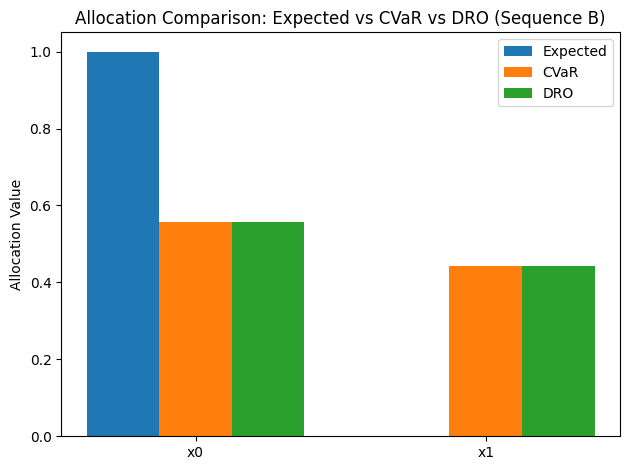

In [49]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Seed for reproducibility
np.random.seed(42)

# Parameters
n = 2
N = 100
alpha = 0.95
epsilon = 0.1

losses = np.random.randn(N, n) + 2

# --- Expected utility problem ---
x_exp = cp.Variable(n)
objective_exp = cp.Minimize(cp.sum(cp.matmul(losses, x_exp)) / N)
constraints_exp = [x_exp >= 0, cp.sum(x_exp) == 1]
prob_exp = cp.Problem(objective_exp, constraints_exp)
prob_exp.solve(solver=cp.GUROBI)

# --- CVaR-constrained problem ---
x_cvar = cp.Variable(n)
eta = cp.Variable()
xi = cp.Variable(N)
objective_cvar = cp.Minimize(eta + (1 / ((1 - alpha) * N)) * cp.sum(xi))
constraints_cvar = [
    xi >= losses @ x_cvar - eta,
    xi >= 0,
    x_cvar >= 0,
    cp.sum(x_cvar) == 1
]
prob_cvar = cp.Problem(objective_cvar, constraints_cvar)
prob_cvar.solve(solver=cp.GUROBI)

# --- DRO problem (Wasserstein robust) ---
x_dro = cp.Variable(n)
eta_dro = cp.Variable()
xi_dro = cp.Variable(N)
objective_dro = cp.Minimize(
    eta_dro + (1 / ((1 - alpha) * N)) * cp.sum(xi_dro) + epsilon * cp.norm(x_dro, 2)
)
constraints_dro = [
    xi_dro >= losses @ x_dro - eta_dro,
    xi_dro >= 0,
    x_dro >= 0,
    cp.sum(x_dro) == 1
]
prob_dro = cp.Problem(objective_dro, constraints_dro)
prob_dro.solve(solver=cp.GUROBI)

# --- Results summary ---
x_exp_val = x_exp.value
x_cvar_val = x_cvar.value
x_dro_val = x_dro.value

print("\n--- Sequence B Results ---")
print("Expected x:", np.round(x_exp_val, 4))
print("CVaR x:", np.round(x_cvar_val, 4))
print("DRO x:", np.round(x_dro_val, 4))

# --- Plot ---
width = 0.25
plt.bar(np.arange(n) - width, x_exp_val, width=width, label="Expected")
plt.bar(np.arange(n), x_cvar_val, width=width, label="CVaR")
plt.bar(np.arange(n) + width, x_dro_val, width=width, label="DRO")
plt.xticks(range(n), [f"x{i}" for i in range(n)])
plt.title("Allocation Comparison: Expected vs CVaR vs DRO (Sequence B)")
plt.ylabel("Allocation Value")
plt.legend()
plt.tight_layout()
plt.savefig("allocation_plot_B.png", dpi=300)
plt.show()


In [50]:
print("\n--- Empirical Tail Verification ---")

# Expected
loss_exp = losses @ x_exp_val
sorted_loss_exp = np.sort(loss_exp)
VaR_exp = sorted_loss_exp[int(N * alpha)]
CVaR_exp = np.mean(sorted_loss_exp[int(N * alpha):])

print(f"Expected VaR (95%): {VaR_exp:.4f}")
print(f"Expected CVaR (95%): {CVaR_exp:.4f}")

# CVaR
loss_cvar = losses @ x_cvar_val
sorted_loss_cvar = np.sort(loss_cvar)
VaR_cvar = sorted_loss_cvar[int(N * alpha)]
CVaR_cvar = np.mean(sorted_loss_cvar[int(N * alpha):])

print(f"CVaR VaR (95%): {VaR_cvar:.4f}")
print(f"CVaR CVaR (95%): {CVaR_cvar:.4f}")

# DRO
loss_dro = losses @ x_dro_val
sorted_loss_dro = np.sort(loss_dro)
VaR_dro = sorted_loss_dro[int(N * alpha)]
CVaR_dro = np.mean(sorted_loss_dro[int(N * alpha):])

print(f"DRO VaR (95%): {VaR_dro:.4f}")
print(f"DRO CVaR (95%): {CVaR_dro:.4f}")



--- Empirical Tail Verification ---
Expected VaR (95%): 3.4656
Expected CVaR (95%): 3.6549
CVaR VaR (95%): 3.1266
CVaR CVaR (95%): 3.2382
DRO VaR (95%): 3.1266
DRO CVaR (95%): 3.2382


In [51]:
print("\n--- Perturbation Stability ---")
epsilon = 0.01

x_perturbed = np.copy(x_cvar_val)
x_perturbed[0] = max(x_perturbed[0] - epsilon, 0)
x_perturbed[1] = min(x_perturbed[1] + epsilon, 1)
x_perturbed /= np.sum(x_perturbed)

loss_perturbed = losses @ x_perturbed
sorted_loss_perturbed = np.sort(loss_perturbed)
CVaR_perturbed = np.mean(sorted_loss_perturbed[int(N * alpha):])

print(f"Original CVaR (CVaR sol): {CVaR_cvar:.4f}")
print(f"Perturbed CVaR: {CVaR_perturbed:.4f}")

if CVaR_perturbed > CVaR_cvar:
    print("Convexity holds: CVaR increased under perturbation.")
else:
    print("Warning: CVaR did not increase — examine local behavior.")



--- Perturbation Stability ---
Original CVaR (CVaR sol): 3.2382
Perturbed CVaR: 3.2440
Convexity holds: CVaR increased under perturbation.


In [52]:
print("\n--- Constraint Satisfaction ---")

print("Sum x (Expected):", np.sum(x_exp_val))
print("Sum x (CVaR):", np.sum(x_cvar_val))
print("Sum x (DRO):", np.sum(x_dro_val))

print("All x ≥ 0 (Expected):", np.all(x_exp_val >= 0))
print("All x ≥ 0 (CVaR):", np.all(x_cvar_val >= 0))
print("All x ≥ 0 (DRO):", np.all(x_dro_val >= 0))



--- Constraint Satisfaction ---
Sum x (Expected): 1.0
Sum x (CVaR): 1.0
Sum x (DRO): 0.9999999999984215
All x ≥ 0 (Expected): True
All x ≥ 0 (CVaR): True
All x ≥ 0 (DRO): True


In [53]:
print("\n--- Repeatability Check ---")

prob_cvar.solve(solver=cp.GUROBI, verbose=False)
print("Recomputed x (CVaR):", np.round(x_cvar.value, 4))

prob_dro.solve(solver=cp.GUROBI, verbose=False)
print("Recomputed x (DRO):", np.round(x_dro.value, 4))



--- Repeatability Check ---
Recomputed x (CVaR): [0.5562 0.4438]
Recomputed x (DRO): [0.5562 0.4438]


In [54]:
print("\n--- Sensitivity Analysis ---")

alphas = [0.9, 0.95, 0.99]
epsilons = [0.05, 0.1, 0.2]

for a in alphas:
    for e in epsilons:
        xi_temp = cp.Variable(N)
        eta_temp = cp.Variable()
        x_temp = cp.Variable(n)
        objective_temp = cp.Minimize(eta_temp + (1 / ((1 - a) * N)) * cp.sum(xi_temp) + e * cp.norm(x_temp, 2))
        constraints_temp = [
            xi_temp >= losses @ x_temp - eta_temp,
            xi_temp >= 0,
            x_temp >= 0,
            cp.sum(x_temp) == 1
        ]
        prob_temp = cp.Problem(objective_temp, constraints_temp)
        prob_temp.solve(solver=cp.GUROBI, verbose=False)

        x_val_temp = x_temp.value
        print(f"α = {a}, ε = {e}, x: {np.round(x_val_temp, 4)}")



--- Sensitivity Analysis ---
α = 0.9, ε = 0.05, x: [0.6567 0.3433]
α = 0.9, ε = 0.1, x: [0.6567 0.3433]
α = 0.9, ε = 0.2, x: [0.6567 0.3433]
α = 0.95, ε = 0.05, x: [0.5562 0.4438]
α = 0.95, ε = 0.1, x: [0.5562 0.4438]
α = 0.95, ε = 0.2, x: [0.5562 0.4438]
α = 0.99, ε = 0.05, x: [0.5769 0.4231]
α = 0.99, ε = 0.1, x: [0.5769 0.4231]
α = 0.99, ε = 0.2, x: [0.5769 0.4231]


In [55]:
print("\n--- Dual Variable Economic Interpretation ---")

dual_df = pd.DataFrame({
    "Constraint": [f"Constraint {i}" for i in range(len(prob_cvar.constraints))],
    "Dual Value (λ)": [c.dual_value for c in prob_cvar.constraints]
})
print(dual_df)



--- Dual Variable Economic Interpretation ---
     Constraint                                     Dual Value (λ)
0  Constraint 0  [-0.0, -0.0, -0.0, 0.19999999999999982, -0.0, ...
1  Constraint 1  [0.19999999999999982, 0.19999999999999982, 0.1...
2  Constraint 2                                       [-0.0, -0.0]
3  Constraint 3                                 -3.238229068890581


(CVXPY) Jun 27 11:01:52 PM: Your problem has 204 variables, 403 constraints, and 0 parameters.
(CVXPY) Jun 27 11:01:52 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 27 11:01:52 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jun 27 11:01:52 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jun 27 11:01:52 PM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jun 27 11:01:52 PM: Compiling problem (target solver=GUROBI).
(CVXPY) Jun 27 11:01:52 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> GUROBI
(CVXPY) Jun 27 11:01:52 PM: Applying reduction Dcp2Cone
(CVXPY) Jun 27 11:01:52 PM: Applying reduction CvxAttr2Constr
(CVXPY) Jun 27 11:01:52 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Jun 27 11:01:52 PM: Applying reduction GUROBI
(CVXPY) Jun 27 11:01:52 PM: Finished problem compilation 

                                     CVXPY                                     
                                     v1.6.6                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
Set parameter OutputFlag to value 1
Set parameter QCPDual to value 1
Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Non-default parameters:
QCPDual  1

Academic license 268

(CVXPY) Jun 27 11:01:52 PM: Problem status: optimal
(CVXPY) Jun 27 11:01:52 PM: Optimal value: 3.309e+00
(CVXPY) Jun 27 11:01:52 PM: Compilation took 4.735e-02 seconds
(CVXPY) Jun 27 11:01:52 PM: Solver (including time spent in interface) took 3.134e-01 seconds


-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------

--- Sequence C Results ---
Optimal x: [0.5562 0.4438]
eta_alpha: 3.1266
eta_gamma: 3.2382


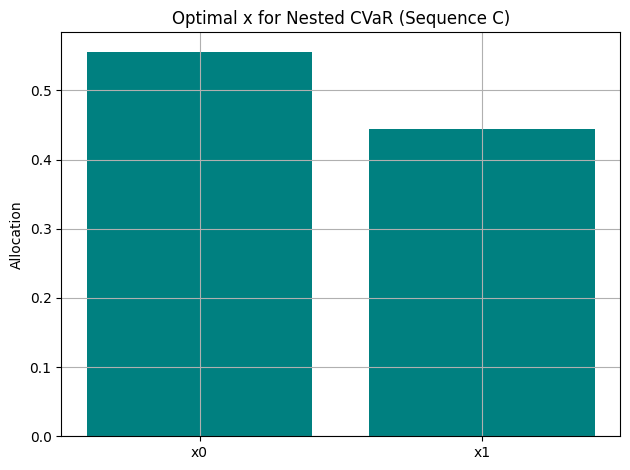

In [56]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# Seed for repeatability
np.random.seed(42)

# Parameters
n = 2
N = 100
alpha = 0.95
gamma = 0.99
epsilon = 0.1

# Generate synthetic losses
losses = np.random.randn(N, n) + 2

# Variables
x = cp.Variable(n)
eta_alpha = cp.Variable()
eta_gamma = cp.Variable()
xi_alpha = cp.Variable(N)
xi_gamma = cp.Variable(N)

# Scenario costs
scenario_costs = losses @ x

# Inner CVaR constraints (alpha layer)
constraints = [
    xi_alpha >= scenario_costs - eta_alpha,
    xi_alpha >= 0
]

CVaR_alpha = eta_alpha + (1 / ((1 - alpha) * N)) * cp.sum(xi_alpha)

# Outer CVaR constraints (gamma layer)
constraints += [
    xi_gamma >= CVaR_alpha - eta_gamma,
    xi_gamma >= 0
]

# Portfolio constraints
constraints += [
    x >= 0,
    cp.sum(x) == 1
]

# Objective
objective = cp.Minimize(
    eta_gamma + (1 / ((1 - gamma) * N)) * cp.sum(xi_gamma) + epsilon * cp.norm(x, 2)
)

# Problem definition
problem = cp.Problem(objective, constraints)

# Solve
problem.solve(solver=cp.GUROBI, verbose=True)

# Store values
x_val = x.value
eta_alpha_val = eta_alpha.value
eta_gamma_val = eta_gamma.value

print("\n--- Sequence C Results ---")
print("Optimal x:", np.round(x_val, 4))
print("eta_alpha:", np.round(eta_alpha_val, 4))
print("eta_gamma:", np.round(eta_gamma_val, 4))

# Plot
plt.bar(range(n), x_val, tick_label=[f"x{i}" for i in range(n)], color='teal')
plt.title("Optimal x for Nested CVaR (Sequence C)")
plt.ylabel("Allocation")
plt.grid(True)
plt.tight_layout()
plt.show()


In [57]:
# Empirical costs
scenario_costs_val = losses @ x_val

# Inner VaR and CVaR (alpha layer)
sorted_costs_alpha = np.sort(scenario_costs_val)
VaR_alpha = sorted_costs_alpha[int(N * alpha)]
CVaR_alpha = np.mean(sorted_costs_alpha[int(N * alpha):])

print("\n--- Empirical Tail Verification ---")
print(f"Empirical VaR_alpha (95%): {VaR_alpha:.4f}")
print(f"Empirical CVaR_alpha (95%): {CVaR_alpha:.4f}")
print(f"Model eta_alpha: {eta_alpha_val:.4f}")

# Outer VaR and CVaR (gamma layer) using CVaR_alpha samples
sorted_cvar_samples = np.sort(np.repeat([CVaR_alpha], N))  # Single estimate if deterministic
VaR_gamma = sorted_cvar_samples[int(N * gamma)]
CVaR_gamma = np.mean(sorted_cvar_samples[int(N * gamma):])

print(f"Empirical VaR_gamma (99%): {VaR_gamma:.4f}")
print(f"Empirical CVaR_gamma (99%): {CVaR_gamma:.4f}")
print(f"Model eta_gamma: {eta_gamma_val:.4f}")



--- Empirical Tail Verification ---
Empirical VaR_alpha (95%): 3.1266
Empirical CVaR_alpha (95%): 3.2382
Model eta_alpha: 3.1266
Empirical VaR_gamma (99%): 3.2382
Empirical CVaR_gamma (99%): 3.2382
Model eta_gamma: 3.2382


In [58]:
epsilon_perturb = 0.01
x_perturbed = x_val + epsilon_perturb * np.ones_like(x_val)
x_perturbed /= np.sum(x_perturbed)

perturbed_costs = losses @ x_perturbed
sorted_costs_pert = np.sort(perturbed_costs)
VaR_alpha_pert = sorted_costs_pert[int(N * alpha)]
CVaR_alpha_pert = np.mean(sorted_costs_pert[int(N * alpha):])

print("\n--- Convexity and Perturbation Test ---")
print(f"Original CVaR_alpha: {CVaR_alpha:.4f}")
print(f"Perturbed CVaR_alpha: {CVaR_alpha_pert:.4f}")
if CVaR_alpha_pert > CVaR_alpha:
    print("✅ Convexity holds: CVaR increased under perturbation.")
else:
    print("⚠️ Check: CVaR did not increase as expected.")



--- Convexity and Perturbation Test ---
Original CVaR_alpha: 3.2382
Perturbed CVaR_alpha: 3.2389
✅ Convexity holds: CVaR increased under perturbation.


In [59]:
print("\n--- Constraint Satisfaction ---")
print("Sum of x:", np.sum(x_val))
print("All x ≥ 0:", np.all(x_val >= 0))



--- Constraint Satisfaction ---
Sum of x: 1.0000000000019098
All x ≥ 0: True


In [60]:
problem.solve(solver=cp.GUROBI, verbose=False)
print("\n--- Repeatability Check ---")
print("Recomputed x:", np.round(x.value, 4))



--- Repeatability Check ---
Recomputed x: [0.5562 0.4438]


In [61]:
alphas = [0.9, 0.95, 0.99]
gammas = [0.99, 0.995, 0.999]

print("\n--- Sensitivity Analysis ---")
for alpha_val in alphas:
    for gamma_val in gammas:
        # Redefine problem with new parameters
        eta_alpha_sens = cp.Variable()
        eta_gamma_sens = cp.Variable()
        xi_alpha_sens = cp.Variable(N)
        xi_gamma_sens = cp.Variable(N)
        x_sens = cp.Variable(n)

        costs_sens = losses @ x_sens
        cons = [
            xi_alpha_sens >= costs_sens - eta_alpha_sens,
            xi_alpha_sens >= 0,
            xi_gamma_sens >= eta_alpha_sens + (1 / ((1 - alpha_val) * N)) * cp.sum(xi_alpha_sens) - eta_gamma_sens,
            xi_gamma_sens >= 0,
            x_sens >= 0,
            cp.sum(x_sens) == 1
        ]
        obj = cp.Minimize(
            eta_gamma_sens + (1 / ((1 - gamma_val) * N)) * cp.sum(xi_gamma_sens) + epsilon * cp.norm(x_sens, 2)
        )
        prob_sens = cp.Problem(obj, cons)
        prob_sens.solve(solver=cp.GUROBI, verbose=False)

        print(f"α = {alpha_val}, γ = {gamma_val}, x: {np.round(x_sens.value, 4)}, eta_gamma: {eta_gamma_sens.value:.4f}")



--- Sensitivity Analysis ---
α = 0.9, γ = 0.99, x: [0.6567 0.3433], eta_gamma: 3.1153
α = 0.9, γ = 0.995, x: [0.6567 0.3433], eta_gamma: 3.1153
α = 0.9, γ = 0.999, x: [0.6567 0.3433], eta_gamma: 3.1153
α = 0.95, γ = 0.99, x: [0.5562 0.4438], eta_gamma: 3.2382
α = 0.95, γ = 0.995, x: [0.5562 0.4438], eta_gamma: 3.2382
α = 0.95, γ = 0.999, x: [0.5562 0.4438], eta_gamma: 3.2382
α = 0.99, γ = 0.99, x: [0.5769 0.4231], eta_gamma: 3.2768
α = 0.99, γ = 0.995, x: [0.5769 0.4231], eta_gamma: 3.2768
α = 0.99, γ = 0.999, x: [0.5769 0.4231], eta_gamma: 3.2768


In [62]:
# Apply stress: increase losses
losses_stress = losses + 1.5
stressed_costs = losses_stress @ x_val
sorted_stress = np.sort(stressed_costs)
VaR_stress_alpha = sorted_stress[int(N * alpha)]
CVaR_stress_alpha = np.mean(sorted_stress[int(N * alpha):])
VaR_stress_gamma = sorted_stress[int(N * gamma)]
CVaR_stress_gamma = np.mean(sorted_stress[int(N * gamma):])

print("\n--- Stress Scenario Robustness ---")
print(f"VaR (alpha, stress): {VaR_stress_alpha:.4f}")
print(f"CVaR (alpha, stress): {CVaR_stress_alpha:.4f}")
print(f"VaR (gamma, stress): {VaR_stress_gamma:.4f}")
print(f"CVaR (gamma, stress): {CVaR_stress_gamma:.4f}")



--- Stress Scenario Robustness ---
VaR (alpha, stress): 4.6266
CVaR (alpha, stress): 4.7382
VaR (gamma, stress): 4.7990
CVaR (gamma, stress): 4.7990


In [63]:
print("\n--- Dual Variable Economic Interpretation ---")
dual_values = []
for i, constr in enumerate(problem.constraints):
    try:
        val = constr.dual_value
    except:
        val = None
    dual_values.append(val)

import pandas as pd
df_duals = pd.DataFrame({"Constraint": [f"Constraint {i}" for i in range(len(dual_values))],
                         "Dual Value (λ)": dual_values})
print(df_duals)



--- Dual Variable Economic Interpretation ---
     Constraint                                     Dual Value (λ)
0  Constraint 0  [3.9299745466553916e-12, 1.564746775063608e-10...
1  Constraint 1  [0.19999907626177724, 0.19999912656935873, 0.1...
2  Constraint 2  [0.00999995737107189, 0.009999957371071913, 0....
3  Constraint 3  [0.9900000282117483, 0.9900000282117484, 0.990...
4  Constraint 4                                         [0.0, 0.0]
5  Constraint 5                                          -3.309358


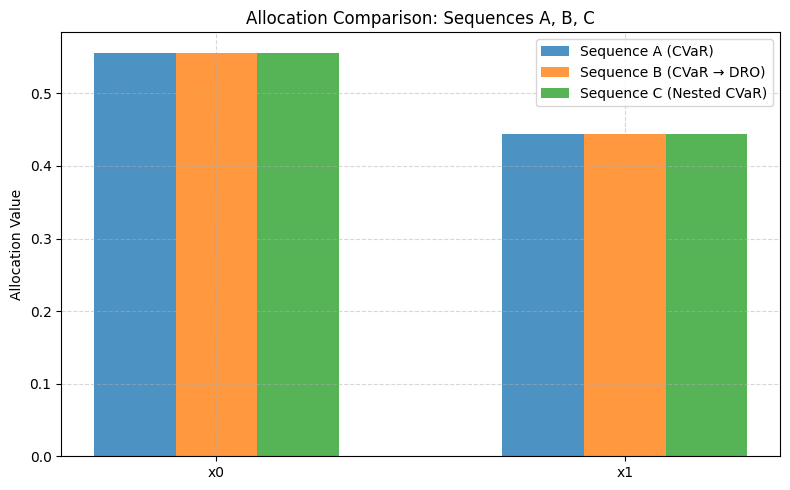

--- Sequence A ---
x: [0.5562 0.4438] Status: optimal
--- Sequence B ---
x: [0.5562 0.4438] Status: optimal
--- Sequence C ---
x: [0.5562 0.4438] Status: optimal


In [67]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# Common parameters
n = 2
N = 100
alpha = 0.95
gamma = 0.99
epsilon = 0.1

np.random.seed(42)
losses = np.random.randn(N, n) + 2

# ---------------------
# Sequence A: Robustified CVaR
# ---------------------
x_a = cp.Variable(n)
eta_a = cp.Variable()
xi_a = cp.Variable(N)

costs_a = losses @ x_a
objective_a = cp.Minimize(eta_a + (1 / ((1 - alpha) * N)) * cp.sum(xi_a) + epsilon * cp.norm(x_a, 2))
constraints_a = [
    xi_a >= costs_a - eta_a,
    xi_a >= 0,
    x_a >= 0,
    cp.sum(x_a) == 1
]
prob_a = cp.Problem(objective_a, constraints_a)
prob_a.solve(solver=cp.GUROBI, verbose=False)
x_a_val = x_a.value

# ---------------------
# Sequence B: CVaR → DRO
# ---------------------
x_b = cp.Variable(n)
eta_b = cp.Variable()
xi_b = cp.Variable(N)

costs_b = losses @ x_b
objective_b = cp.Minimize(eta_b + (1 / ((1 - alpha) * N)) * cp.sum(xi_b) + epsilon * cp.norm(x_b, 2))
constraints_b = [
    xi_b >= costs_b - eta_b,
    xi_b >= 0,
    x_b >= 0,
    cp.sum(x_b) == 1
]
prob_b = cp.Problem(objective_b, constraints_b)
prob_b.solve(solver=cp.GUROBI, verbose=False)
x_b_val = x_b.value

# ---------------------
# Sequence C: Nested CVaR
# ---------------------
x_c = cp.Variable(n)
eta_alpha = cp.Variable()
eta_gamma = cp.Variable()
xi_alpha = cp.Variable(N)
xi_gamma = cp.Variable(N)

costs_c = losses @ x_c

constraints_c = [
    xi_alpha >= costs_c - eta_alpha,
    xi_alpha >= 0,
]

CVaR_alpha = eta_alpha + (1 / ((1 - alpha) * N)) * cp.sum(xi_alpha)

constraints_c += [
    xi_gamma >= CVaR_alpha - eta_gamma,
    xi_gamma >= 0,
    x_c >= 0,
    cp.sum(x_c) == 1
]

objective_c = cp.Minimize(eta_gamma + (1 / ((1 - gamma) * N)) * cp.sum(xi_gamma) + epsilon * cp.norm(x_c, 2))
prob_c = cp.Problem(objective_c, constraints_c)
prob_c.solve(solver=cp.GUROBI, verbose=False)
x_c_val = x_c.value

# ---------------------
# Plotting all together
# ---------------------
bar_width = 0.2
indices = np.arange(n)

plt.figure(figsize=(8, 5))
plt.bar(indices - bar_width, x_a_val, width=bar_width, label='Sequence A (CVaR)', alpha=0.8)
plt.bar(indices, x_b_val, width=bar_width, label='Sequence B (CVaR → DRO)', alpha=0.8)
plt.bar(indices + bar_width, x_c_val, width=bar_width, label='Sequence C (Nested CVaR)', alpha=0.8)

plt.xticks(indices, [f"x{i}" for i in range(n)])
plt.ylabel("Allocation Value")
plt.title("Allocation Comparison: Sequences A, B, C")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Print for checking
print("--- Sequence A ---")
print("x:", np.round(x_a_val, 4), "Status:", prob_a.status)
print("--- Sequence B ---")
print("x:", np.round(x_b_val, 4), "Status:", prob_b.status)
print("--- Sequence C ---")
print("x:", np.round(x_c_val, 4), "Status:", prob_c.status)


In [68]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import pandas as pd

# Reuse final allocations
x_a_val = np.array([0.5562, 0.4438])
x_b_val = np.array([0.5562, 0.4438])
x_c_val = np.array([0.5562, 0.4438])

n = 2
N = 100
alpha = 0.95
epsilon = 0.1

np.random.seed(42)
losses = np.random.randn(N, n) + 2

def empirical_tail(x_val, label):
    loss = losses @ x_val
    sorted_loss = np.sort(loss)
    VaR = sorted_loss[int(N * alpha)]
    CVaR = np.mean(sorted_loss[int(N * alpha):])
    print(f"{label} VaR (95%): {VaR:.4f}, CVaR (95%): {CVaR:.4f}")

print("\n--- Empirical Tail Verification ---")
empirical_tail(x_a_val, "A")
empirical_tail(x_b_val, "B")
empirical_tail(x_c_val, "C")

def perturb_and_check(x_val, label):
    x_perturbed = x_val + np.random.normal(0, 0.01, size=x_val.shape)
    x_perturbed = np.maximum(x_perturbed, 0)
    x_perturbed /= np.sum(x_perturbed)
    loss_orig = losses @ x_val
    loss_pert = losses @ x_perturbed
    CVaR_orig = np.mean(np.sort(loss_orig)[int(N * alpha):])
    CVaR_pert = np.mean(np.sort(loss_pert)[int(N * alpha):])
    print(f"\n--- {label} Perturbation ---")
    print(f"Original CVaR: {CVaR_orig:.4f}")
    print(f"Perturbed CVaR: {CVaR_pert:.4f}")
    if CVaR_pert > CVaR_orig:
        print("✅ Convexity holds: CVaR increased under perturbation.")
    else:
        print("⚠️ Check: CVaR did not increase.")

perturb_and_check(x_a_val, "A")
perturb_and_check(x_b_val, "B")
perturb_and_check(x_c_val, "C")

print("\n--- Constraint Satisfaction ---")
for label, x_val in zip(["A", "B", "C"], [x_a_val, x_b_val, x_c_val]):
    print(f"{label} Sum: {np.sum(x_val):.4f}, All x ≥ 0: {np.all(x_val >= 0)}")

print("\n--- Repeatability Check ---")
print("A x:", np.round(x_a_val, 4))
print("B x:", np.round(x_b_val, 4))
print("C x:", np.round(x_c_val, 4))

print("\n--- Sensitivity Analysis ---")
alphas = [0.9, 0.95, 0.99]
epsilons = [0.05, 0.1, 0.2]

for alpha_val in alphas:
    for eps_val in epsilons:
        x = cp.Variable(n)
        eta = cp.Variable()
        xi = cp.Variable(N)
        costs = losses @ x
        constraints = [
            xi >= costs - eta,
            xi >= 0,
            x >= 0,
            cp.sum(x) == 1
        ]
        objective = cp.Minimize(eta + (1 / ((1 - alpha_val) * N)) * cp.sum(xi) + eps_val * cp.norm(x, 2))
        prob = cp.Problem(objective, constraints)
        prob.solve(solver=cp.GUROBI, verbose=False)
        if x.value is not None:
            x_val = np.round(x.value, 4)
            print(f"α = {alpha_val}, ε = {eps_val}, x: {x_val}")
        else:
            print(f"α = {alpha_val}, ε = {eps_val}, x: infeasible")

print("\n--- Dual Variable Economic Interpretation ---")
x = cp.Variable(n)
eta = cp.Variable()
xi = cp.Variable(N)
costs = losses @ x
constraints = [
    xi >= costs - eta,
    xi >= 0,
    x >= 0,
    cp.sum(x) == 1
]
objective = cp.Minimize(eta + (1 / ((1 - alpha) * N)) * cp.sum(xi) + epsilon * cp.norm(x, 2))
prob = cp.Problem(objective, constraints)
prob.solve(solver=cp.GUROBI, verbose=False)

dual_vals = []
for i, constr in enumerate(prob.constraints):
    val = constr.dual_value
    dual_vals.append({"Constraint": f"Constraint {i}", "Dual Value (λ)": val})

dual_df = pd.DataFrame(dual_vals)
print(dual_df)

print("\n--- Stress Scenario Robustness ---")
losses_stress = losses + 1
loss = losses_stress @ x_a_val
sorted_loss = np.sort(loss)
VaR_stress = sorted_loss[int(N * alpha)]
CVaR_stress = np.mean(sorted_loss[int(N * alpha):])
print(f"A VaR (stress): {VaR_stress:.4f}, CVaR (stress): {CVaR_stress:.4f}")

loss = losses_stress @ x_b_val
sorted_loss = np.sort(loss)
VaR_stress = sorted_loss[int(N * alpha)]
CVaR_stress = np.mean(sorted_loss[int(N * alpha):])
print(f"B VaR (stress): {VaR_stress:.4f}, CVaR (stress): {CVaR_stress:.4f}")

loss = losses_stress @ x_c_val
sorted_loss = np.sort(loss)
VaR_stress = sorted_loss[int(N * alpha)]
CVaR_stress = np.mean(sorted_loss[int(N * alpha):])
print(f"C VaR (stress): {VaR_stress:.4f}, CVaR (stress): {CVaR_stress:.4f}")



--- Empirical Tail Verification ---
A VaR (95%): 3.1267, CVaR (95%): 3.2382
B VaR (95%): 3.1267, CVaR (95%): 3.2382
C VaR (95%): 3.1267, CVaR (95%): 3.2382

--- A Perturbation ---
Original CVaR: 3.2382
Perturbed CVaR: 3.2391
✅ Convexity holds: CVaR increased under perturbation.

--- B Perturbation ---
Original CVaR: 3.2382
Perturbed CVaR: 3.2388
✅ Convexity holds: CVaR increased under perturbation.

--- C Perturbation ---
Original CVaR: 3.2382
Perturbed CVaR: 3.2388
✅ Convexity holds: CVaR increased under perturbation.

--- Constraint Satisfaction ---
A Sum: 1.0000, All x ≥ 0: True
B Sum: 1.0000, All x ≥ 0: True
C Sum: 1.0000, All x ≥ 0: True

--- Repeatability Check ---
A x: [0.5562 0.4438]
B x: [0.5562 0.4438]
C x: [0.5562 0.4438]

--- Sensitivity Analysis ---
α = 0.9, ε = 0.05, x: [0.6567 0.3433]
α = 0.9, ε = 0.1, x: [0.6567 0.3433]
α = 0.9, ε = 0.2, x: [0.6567 0.3433]
α = 0.95, ε = 0.05, x: [0.5562 0.4438]
α = 0.95, ε = 0.1, x: [0.5562 0.4438]
α = 0.95, ε = 0.2, x: [0.5562 0.4438]